In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense
from scipy import stats

import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, Bidirectional
from keras.regularizers import l2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       Tanggal    Harga
0   2017-01-01  2071.03
1   2017-01-15  2088.73
2   2017-02-01  2147.86
3   2017-02-15  2132.92
4   2017-03-01  1953.00
..         ...      ...
180 2024-07-01  2747.00
181 2024-07-15  2836.00
182 2024-08-01  2836.00
183 2024-08-15  2855.00
184 2024-09-01  2941.00

[185 rows x 2 columns]


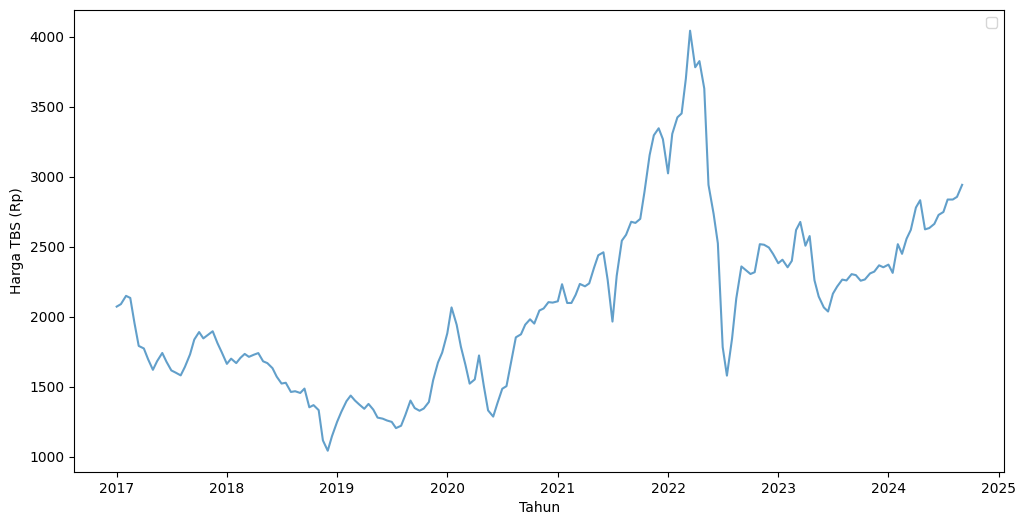

In [140]:
# Load and preprocess data
df = pd.read_csv("tbs_kalbar.csv", delimiter=';')
df = df.iloc[:, :2]  # Keep only the first two columns

df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y')
df['Harga'] = df['Harga'].str.replace(',', '.').astype(float)

print(df)
# Visualisasi perbandingan data asli dan data yang telah di-winsorize
plt.figure(figsize=(12, 6))
plt.plot(df['Tanggal'], df['Harga'], alpha=0.7)
plt.xlabel('Tahun')
plt.ylabel('Harga TBS (Rp)')
plt.legend()
plt.show()



[[0.3431348 ]
 [0.34903368]
 [0.36873994]
 [0.36376089]
 [0.30379894]
 [0.24950259]
 [0.2434904 ]
 [0.21788194]
 [0.19263673]
 [0.21334946]
 [0.23273911]
 [0.21174977]
 [0.19119701]
 [0.18609464]
 [0.17939591]
 [0.19964873]
 [0.22938308]
 [0.26470304]
 [0.28253632]
 [0.26746918]
 [0.27666077]
 [0.28444929]
 [0.25584139]
 [0.23437214]
 [0.20680404]
 [0.21919502]
 [0.20865369]
 [0.22120797]
 [0.23046954]
 [0.22354753]
 [0.2287632 ]
 [0.23247916]
 [0.21286955]
 [0.20861703]
 [0.19658931]
 [0.1763365 ]
 [0.15993961]
 [0.16182925]
 [0.13994341]
 [0.14163309]
 [0.13753054]
 [0.14795189]
 [0.10341368]
 [0.10856937]
 [0.09661164]
 [0.02461199]
 [0.        ]
 [0.03447012]
 [0.06870361]
 [0.09255242]
 [0.1178976 ]
 [0.13134838]
 [0.11962727]
 [0.11032237]
 [0.0998477 ]
 [0.11143216]
 [0.0977181 ]
 [0.07887168]
 [0.0763255 ]
 [0.07204298]
 [0.06862696]
 [0.05385977]
 [0.05948536]
 [0.08499052]
 [0.11940731]
 [0.10156404]
 [0.09518525]
 [0.10045425]
 [0.11608128]
 [0.16765148]
 [0.20987012]
 [0.23

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


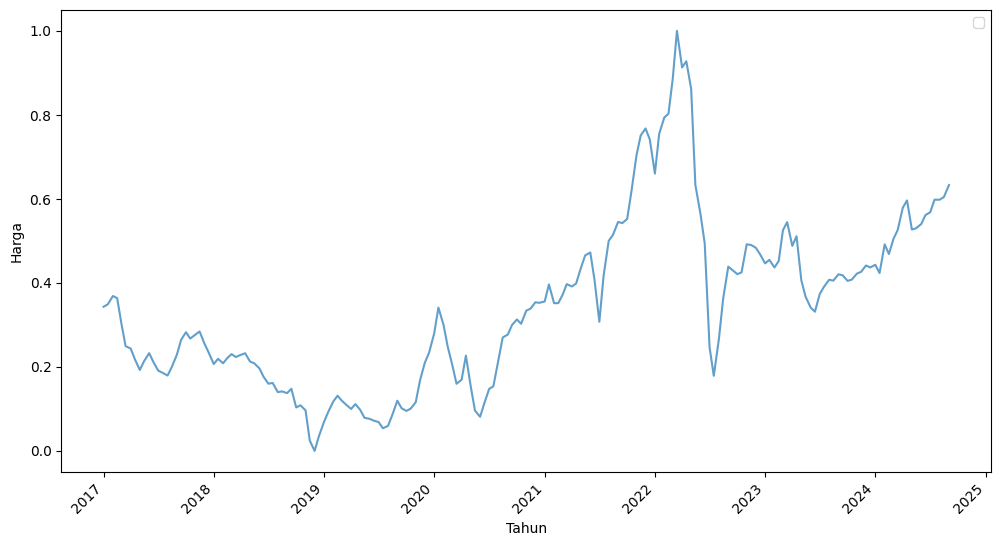

In [141]:

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(df['Harga'].values.reshape(-1, 1))
print(data_normalized)

plt.figure(figsize=(12, 6))
plt.plot(df['Tanggal'], data_normalized, alpha=0.7)
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()




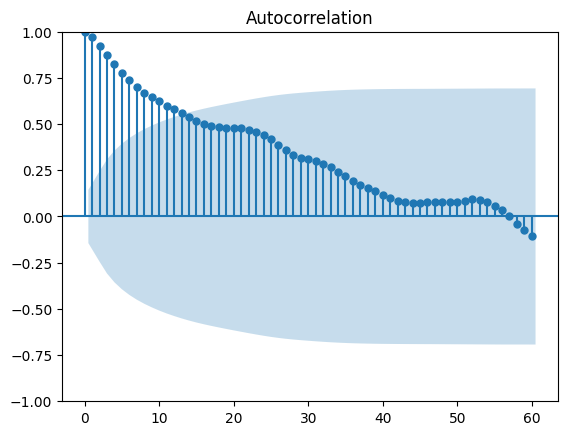

[ 1.00000000e+00  9.69139299e-01  9.22919709e-01  8.75799345e-01
  8.23085913e-01  7.76324010e-01  7.37505691e-01  6.99734716e-01
  6.69646540e-01  6.48614499e-01  6.22690656e-01  5.98324424e-01
  5.79811652e-01  5.59037843e-01  5.38173022e-01  5.17812086e-01
  4.99765316e-01  4.88312902e-01  4.83646599e-01  4.79087403e-01
  4.77458124e-01  4.76071397e-01  4.68354991e-01  4.57946001e-01
  4.42222132e-01  4.16745257e-01  3.88276951e-01  3.57581936e-01
  3.32769561e-01  3.17724427e-01  3.11070750e-01  3.00142203e-01
  2.84678402e-01  2.65781687e-01  2.40997564e-01  2.17586501e-01
  1.93901525e-01  1.73012206e-01  1.56050252e-01  1.37967815e-01
  1.15362726e-01  9.75200230e-02  8.56204345e-02  7.76592355e-02
  7.41916685e-02  7.34191207e-02  7.63628515e-02  7.94692781e-02
  8.10439388e-02  8.01766648e-02  8.06605329e-02  8.62636125e-02
  9.27514251e-02  9.13921100e-02  7.83647486e-02  5.91889551e-02
  3.55856234e-02  5.18704296e-04 -3.83314128e-02 -7.45982346e-02
 -1.06897804e-01]


In [142]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_normalized.flatten(),lags=60, alpha=0.05)
plt.show()


acf_values = acf(data_normalized.flatten(), nlags=60)


print(acf_values)

Determined sequence length: 40


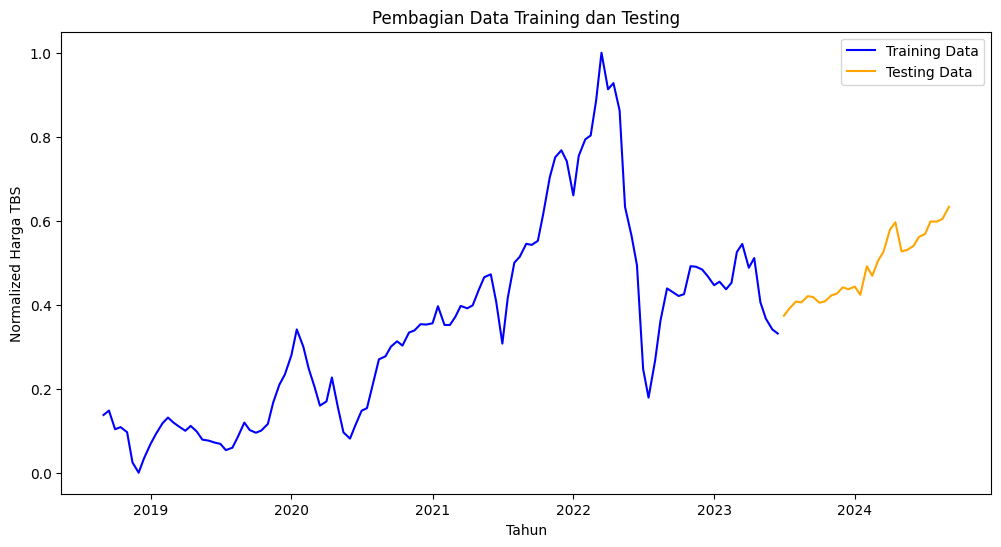

In [143]:

# seq_length = determine_seq_length(acf_values)
seq_length = 40

print(f"Determined sequence length: {seq_length}")

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(data_normalized, seq_length)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


train_dates = df['Tanggal'][seq_length:len(X_train) + seq_length]
test_dates = df['Tanggal'][len(X_train) + seq_length:]

plt.figure(figsize=(12, 6))
plt.plot(train_dates, y_train, label='Training Data', color='blue')
plt.plot(test_dates, y_test, label='Testing Data', color='orange')
plt.xlabel('Tahun')
plt.ylabel('Normalized Harga TBS')
plt.title('Pembagian Data Training dan Testing')
plt.legend()
plt.show()


In [144]:
# Define models

def build_gru_model(input_shape, num_layers=1, bidirectional=False):
    model = Sequential()
    for _ in range(num_layers - 1):
        if bidirectional:
            model.add(Bidirectional(GRU(units=50, return_sequences=True), input_shape=input_shape))
        else:
            model.add(GRU(units=50, return_sequences=True, input_shape=input_shape))
        input_shape = (None, 50)  # Adjust input shape for stacked layers
    if bidirectional:
        model.add(Bidirectional(GRU(units=50, return_sequences=False)))
    else:
        model.add(GRU(units=50, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Vanilla GRU
model_gru = Sequential()
model_gru.add(GRU(units=50, return_sequences=False, input_shape=(seq_length, 1)))
model_gru.add(Dense(1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Bidirectional GRU
model_bigru = Sequential()
model_bigru.add(Bidirectional(GRU(units=50, return_sequences=False), input_shape=(seq_length, 1)))
model_bigru.add(Dense(1))
model_bigru.compile(optimizer='adam', loss='mean_squared_error')

# 2-stacked GRU
model_gru_2 = build_gru_model((seq_length, 1), num_layers=2, bidirectional=False)

# 3-stacked GRU
model_gru_3 = build_gru_model((seq_length, 1), num_layers=3, bidirectional=False)

# Bidirectional 2-stacked GRU
model_bigru_2 = build_gru_model((seq_length, 1), num_layers=2, bidirectional=True)

# Bidirectional 3-stacked GRU
model_bigru_3 = build_gru_model((seq_length, 1), num_layers=3, bidirectional=True)

# # Train models
# def train_model(model, X_train, y_train):
#     return model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

# Train models with early stopping
def train_model(model, X_train, y_train):
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
    return model.fit(X_train, y_train, epochs=500, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


history_gru = train_model(model_gru, X_train, y_train)
history_bigru = train_model(model_bigru, X_train, y_train)
history_gru_2 = train_model(model_gru_2, X_train, y_train)
history_gru_3 = train_model(model_gru_3, X_train, y_train)
history_bigru_2 = train_model(model_bigru_2, X_train, y_train)
history_bigru_3 = train_model(model_bigru_3, X_train, y_train)



Epoch 1/500
2/2 [==============================] - 3s 464ms/step - loss: 0.1910 - val_loss: 0.1647
Epoch 2/500
2/2 [==============================] - 0s 43ms/step - loss: 0.1490 - val_loss: 0.1202
Epoch 3/500
2/2 [==============================] - 0s 46ms/step - loss: 0.1152 - val_loss: 0.0826
Epoch 4/500
2/2 [==============================] - 0s 42ms/step - loss: 0.0857 - val_loss: 0.0524
Epoch 5/500
2/2 [==============================] - 0s 45ms/step - loss: 0.0610 - val_loss: 0.0302
Epoch 6/500
2/2 [==============================] - 0s 45ms/step - loss: 0.0412 - val_loss: 0.0165
Epoch 7/500
2/2 [==============================] - 0s 44ms/step - loss: 0.0306 - val_loss: 0.0115
Epoch 8/500
2/2 [==============================] - 0s 42ms/step - loss: 0.0235 - val_loss: 0.0144
Epoch 9/500
2/2 [==============================] - 0s 42ms/step - loss: 0.0237 - val_loss: 0.0219
Epoch 10/500
2/2 [==============================] - 0s 44ms/step - loss: 0.0254 - val_loss: 0.0285
Epoch 11/500
2/2 [

In [151]:
print(history_gru)

In [145]:
# Plotting function for training and validation loss
def plot_training_history(histories, model_names, title):
    plt.figure(figsize=(12, 6))
    for i, (history, name) in enumerate(zip(histories, model_names)):
        plt.plot(history.history['loss'], label=f'{name} - Training Loss')
        plt.plot(history.history['val_loss'], label=f'{name} - Validation Loss', linestyle='--')
    
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

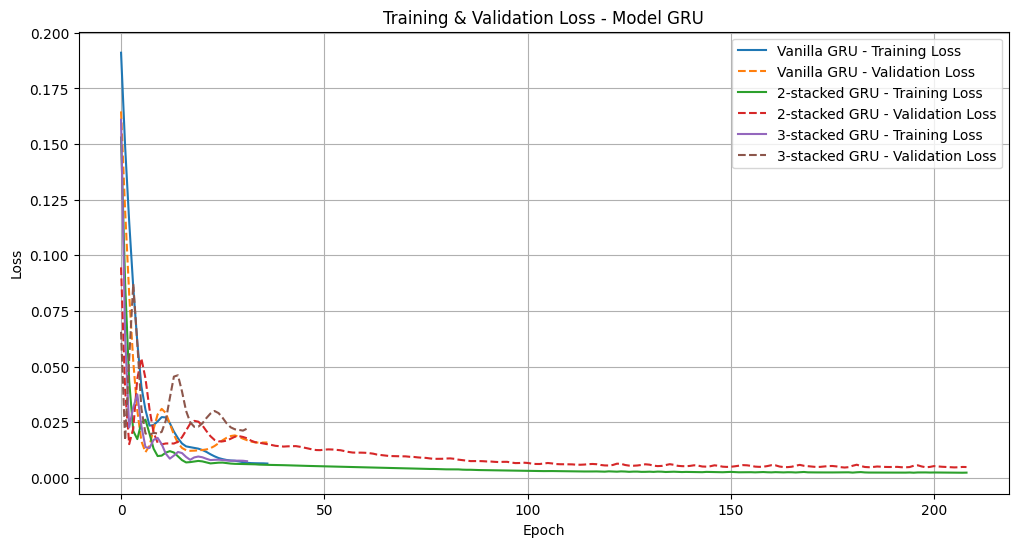

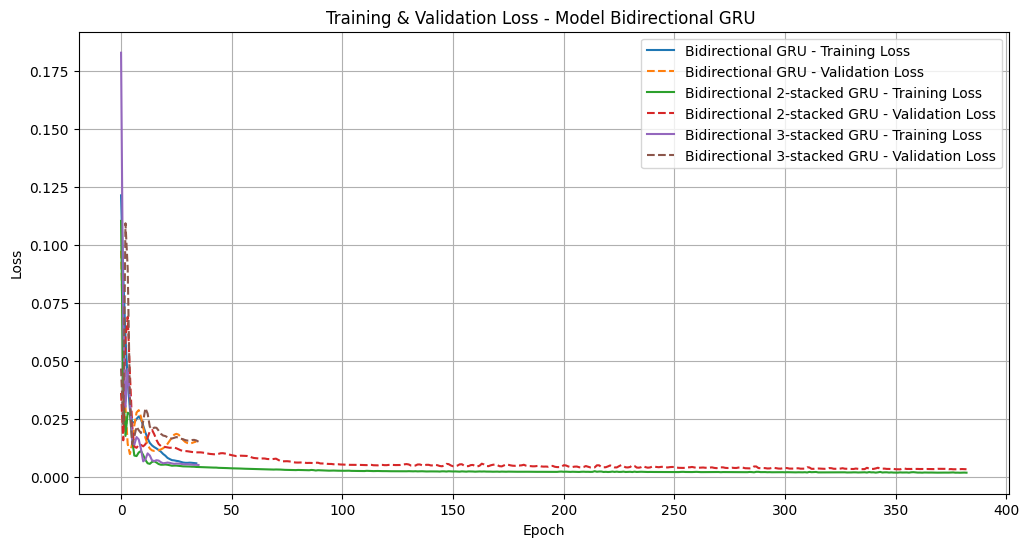

In [146]:
# Separate histories for GRU and BiGRU models
gru_histories = [history_gru, history_gru_2, history_gru_3]
bigru_histories = [history_bigru, history_bigru_2, history_bigru_3]

gru_model_names = ['Vanilla GRU', '2-stacked GRU', '3-stacked GRU']
bigru_model_names = ['Bidirectional GRU', 'Bidirectional 2-stacked GRU', 'Bidirectional 3-stacked GRU']

# Plot GRU models
plot_training_history(gru_histories, gru_model_names, 'Training & Validation Loss - Model GRU')

# Plot BiGRU models
plot_training_history(bigru_histories, bigru_model_names, 'Training & Validation Loss - Model Bidirectional GRU ')

# Evaluate models
def evaluate_model(model, X_test, y_test):
    loss = model.evaluate(X_test, y_test)
    predictions = model.predict(X_test)
    predictions_denormalized = scaler.inverse_transform(predictions.reshape(-1, 1))
    y_test_denormalized = scaler.inverse_transform(y_test.reshape(-1, 1))
    rmse = np.sqrt(np.mean((y_test_denormalized - predictions_denormalized) ** 2))
    mape = np.mean(np.abs((y_test_denormalized - predictions_denormalized) / y_test_denormalized)) * 100
    return loss, rmse, mape, predictions_denormalized, y_test_denormalized

print()
# Collect results
results = {}

1/1 [==============================] - 0s 377ms/step


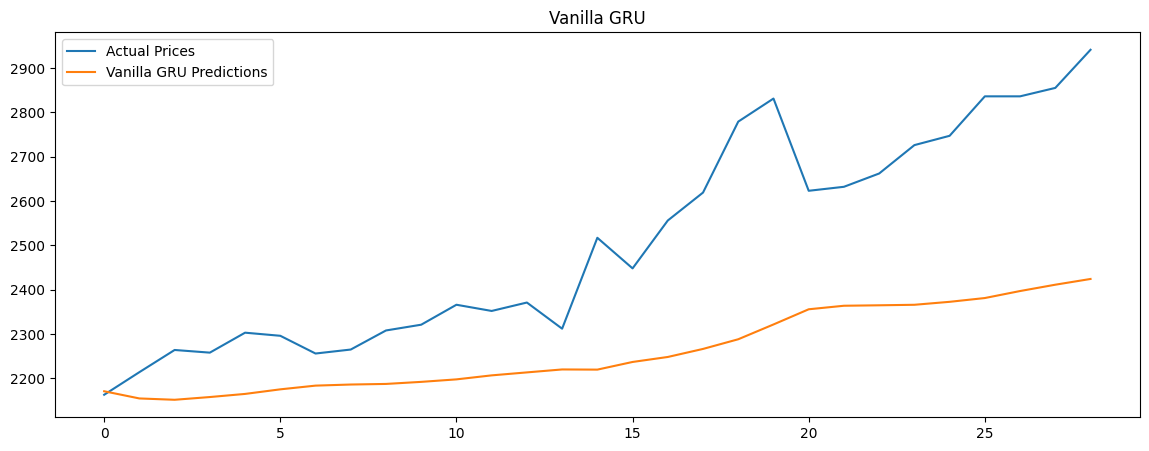

1/1 [==============================] - 1s 673ms/step


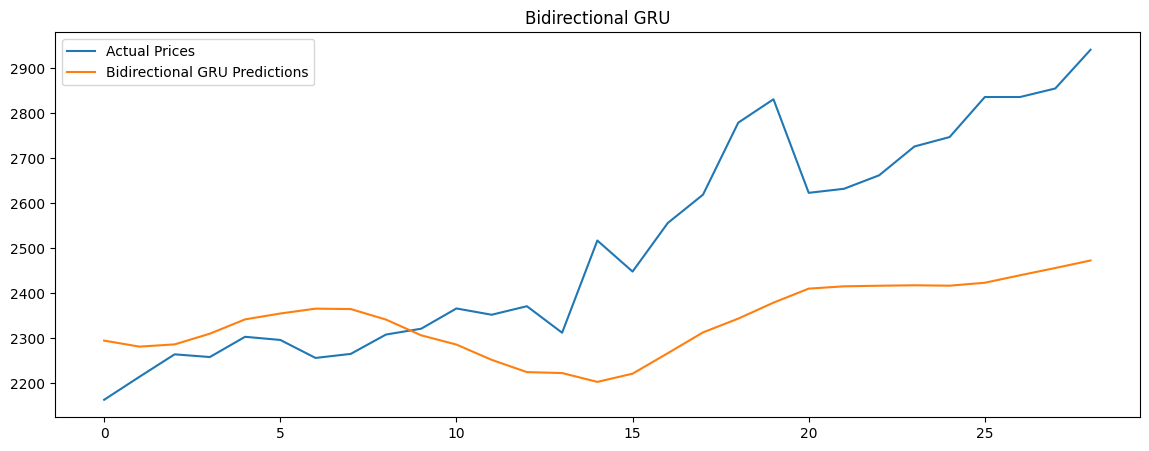

1/1 [==============================] - 1s 656ms/step


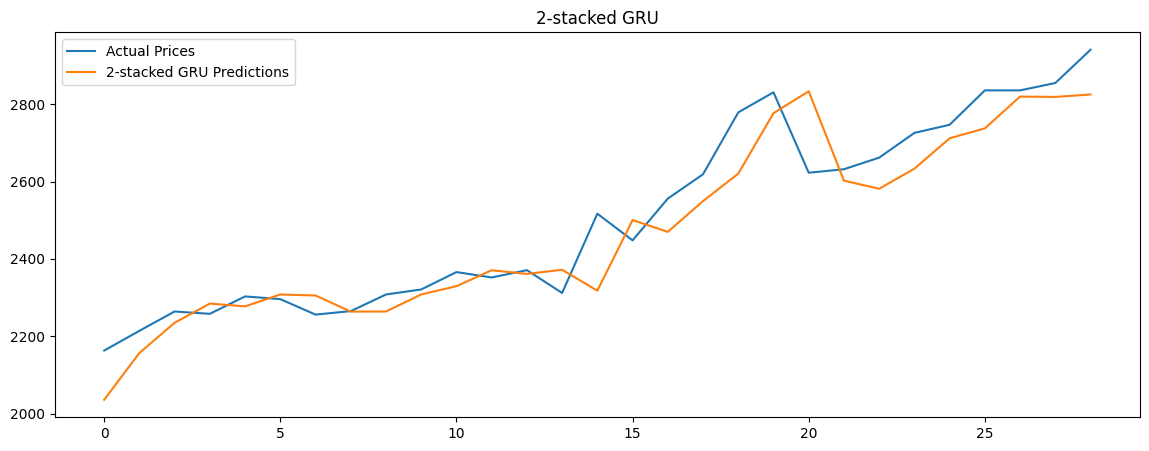

1/1 [==============================] - 1s 1s/step


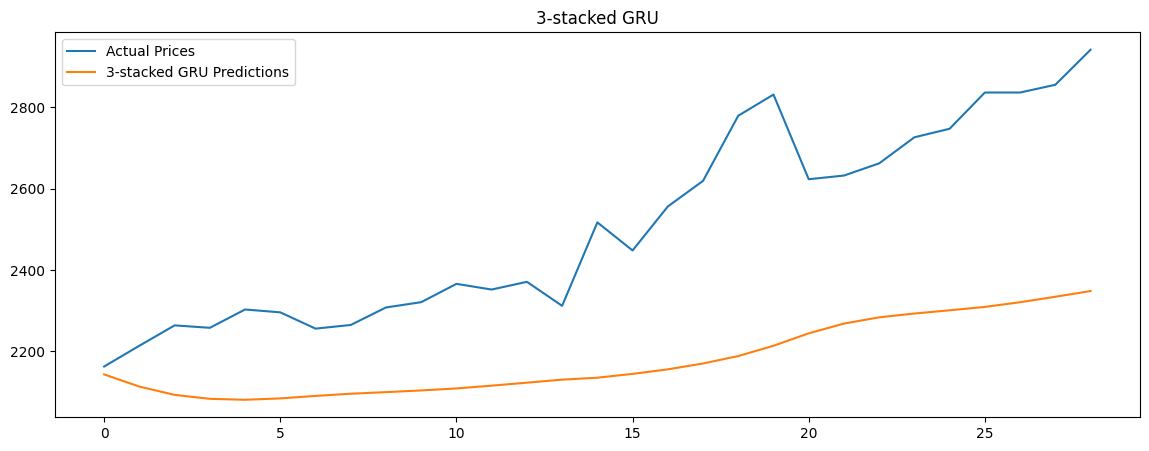

1/1 [==============================] - 1s 1s/step


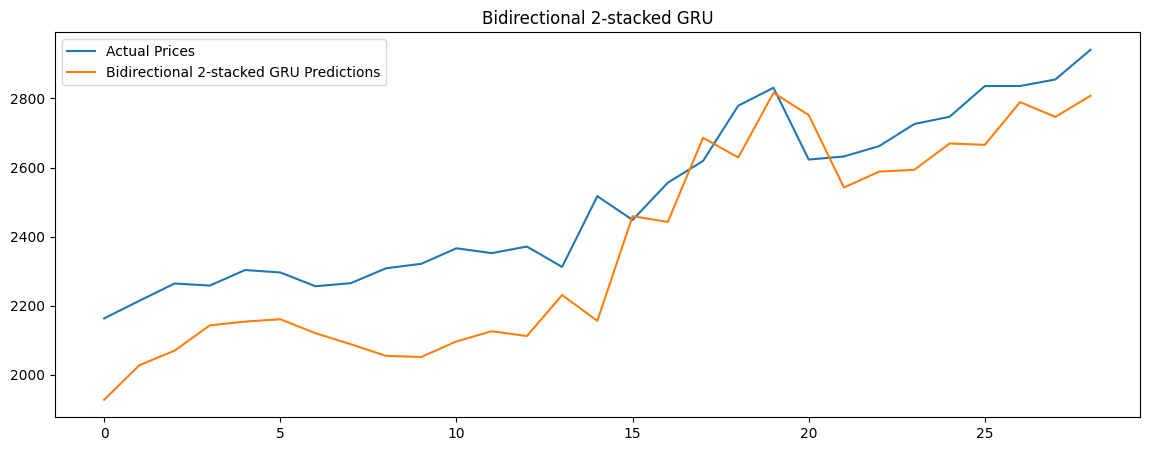

1/1 [==============================] - 2s 2s/step


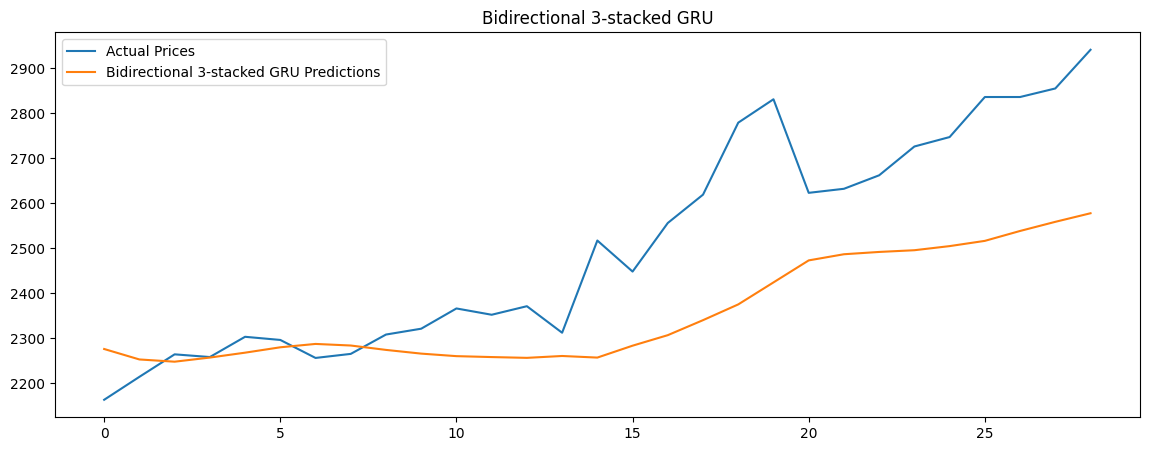

Vanilla GRU - Loss: 0.009203308261930943, RMSE: 287.856308477579, MAPE: 9.299859481667786
Bidirectional GRU - Loss: 0.007216199301183224, RMSE: 254.89311870574986, MAPE: 7.911764129248053
2-stacked GRU - Loss: 0.0007681213319301605, RMSE: 83.16083883119553, MAPE: 2.496089462786142
3-stacked GRU - Loss: 0.014646409079432487, RMSE: 363.1360393244958, MAPE: 12.583730136098787
Bidirectional 2-stacked GRU - Loss: 0.0032631023786962032, RMSE: 171.4033739040601, MAPE: 6.200945039094095
Bidirectional 3-stacked GRU - Loss: 0.0046602701768279076, RMSE: 204.83746593226107, MAPE: 6.118868141799065


In [147]:
for model_name, model in [('Vanilla GRU', model_gru),
                           ('Bidirectional GRU', model_bigru),
                           ('2-stacked GRU', model_gru_2),
                           ('3-stacked GRU', model_gru_3),
                           ('Bidirectional 2-stacked GRU', model_bigru_2),
                           ('Bidirectional 3-stacked GRU', model_bigru_3)]:
    loss, rmse, mape, predictions, y_test_denormalized = evaluate_model(model, X_test, y_test)
    results[model_name] = {'loss': loss, 'RMSE': rmse, 'MAPE': mape}
    plt.figure(figsize=(14, 5))
    plt.plot(y_test_denormalized, label='Actual Prices')
    plt.plot(predictions, label=f'{model_name} Predictions')
    plt.legend()
    plt.title(model_name)
    plt.show()

for model_name, metrics in results.items():
    print(f'{model_name} - Loss: {metrics["loss"]}, RMSE: {metrics["RMSE"]}, MAPE: {metrics["MAPE"]}')

# Function to make future predictions
def predict_future(model, data, seq_length, future_periods):
    predictions = []
    current_sequence = data[-seq_length:]
    
    for _ in range(future_periods):
        prediction = model.predict(current_sequence.reshape(1, seq_length, 1))
        predictions.append(prediction[0, 0])
        current_sequence = np.append(current_sequence[1:], prediction, axis=0)
    
    return np.array(predictions)

# Select the best model based on MAPE
best_model_name = min(results, key=lambda k: results[k]['MAPE'])
best_model = {
    'Vanilla GRU': model_gru,
    'Bidirectional GRU': model_bigru,
    '2-stacked GRU': model_gru_2,
    '3-stacked GRU': model_gru_3,
    'Bidirectional 2-stacked GRU': model_bigru_2,
    'Bidirectional 3-stacked GRU': model_bigru_3
}[best_model_name]

1/1 [==============================] - 0s 25ms/step


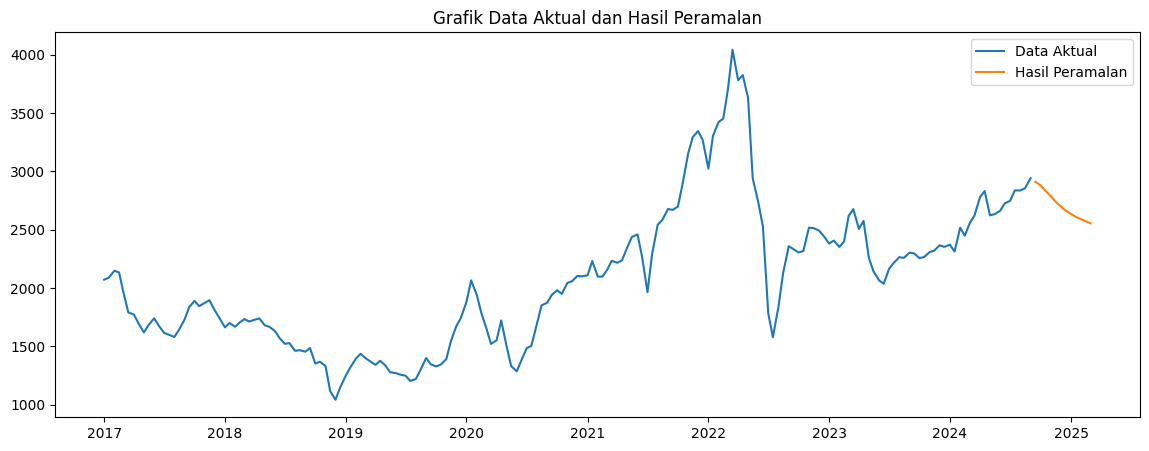

Best Model: 2-stacked GRU
 Grafik Peramalan Harga TBS 6 tbulan Kedepan: [2910.5415 2880.1843 2835.1184 2786.8594 2740.9226 2699.9482 2664.7107
 2634.9314 2609.8591 2588.6328 2570.4617 2554.6958]


In [148]:
# Predict the next 12 periods
future_periods = 12
future_predictions = predict_future(best_model, data_normalized, seq_length, future_periods)
future_predictions_denormalized = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Plot future predictions
import pandas as pd
import matplotlib.pyplot as plt

# Create a proper DatetimeIndex
DatetimeIndex = pd.DatetimeIndex(['2024-09-15', '2024-10-01', '2024-10-15', '2024-11-01', 
                                    '2024-11-15', '2024-12-01', '2024-12-15', '2025-01-01', 
                                    '2025-01-15', '2025-02-01', '2025-02-15', '2025-03-01' 
                                    ])


# Plot future predictions
plt.figure(figsize=(14, 5))
plt.plot(df['Tanggal'], df['Harga'], label='Data Aktual')
plt.plot(DatetimeIndex, future_predictions_denormalized[:len(DatetimeIndex)], label='Hasil Peramalan')
plt.legend()
plt.title(f'Grafik Data Aktual dan Hasil Peramalan')
plt.show()

print(f'Best Model: {best_model_name}')
print(f' Grafik Peramalan Harga TBS 6 tbulan Kedepan: {future_predictions_denormalized.flatten()}')



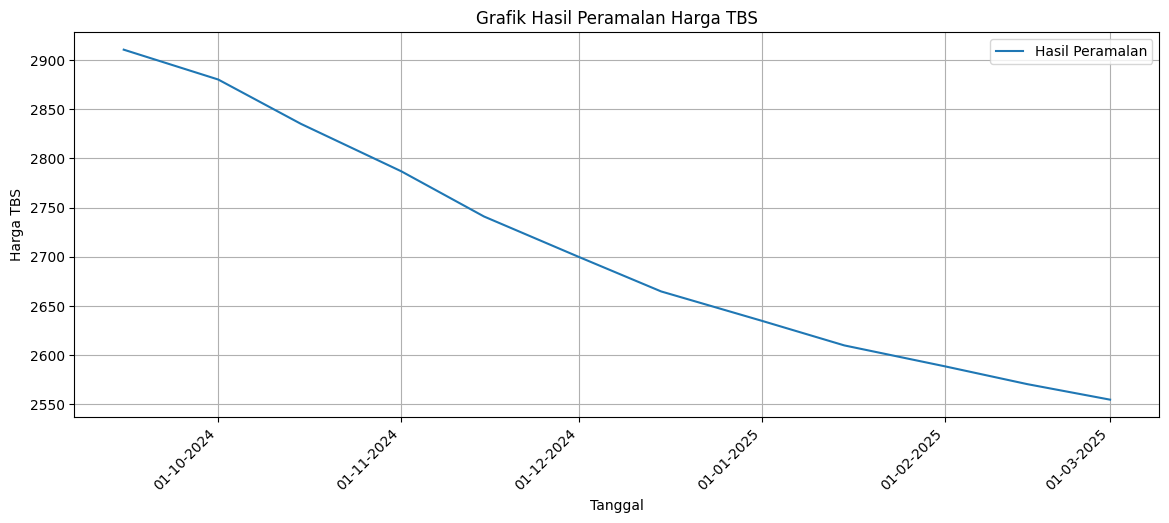

In [149]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

# Data tanggal sesuai permintaan
dates = ['2024-09-15', '2024-10-01', '2024-10-15', '2024-11-01', 
         '2024-11-15', '2024-12-01', '2024-12-15', '2025-01-01', 
         '2025-01-15', '2025-02-01', '2025-02-15', '2025-03-01'
]

# Konversi ke DatetimeIndex
DatetimeIndex = pd.to_datetime(dates)


# Plot hasil prediksi
plt.figure(figsize=(14, 5))
plt.plot(DatetimeIndex, future_predictions_denormalized[:len(DatetimeIndex)], label='Hasil Peramalan')
plt.legend()
plt.title('Grafik Hasil Peramalan Harga TBS')
plt.xlabel('Tanggal')
plt.ylabel('Harga TBS')
plt.grid(True)

# Format sumbu x untuk menampilkan tanggal secara lengkap (hari, bulan, tahun)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotasi label tanggal agar tidak tumpang tindih
plt.xticks(rotation=45, ha='right')

# Tampilkan grafik
plt.show()


In [150]:
# # Simpan model terbaik sebagai file .h5
# best_model.save('best_gru_model2.h5')
# print("Model terbaik telah disimpan sebagai 'best_gru_model.h5'.")


Model terbaik telah disimpan sebagai 'best_gru_model.h5'.


C:\Users\nazam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
